# Imports



In [ ]:
pip install columnar #package to print table of data 

In [ ]:
from collections import defaultdict
import sys
import math
import time
import heapq
import gc
import zipfile
from time import perf_counter_ns
import os
import matplotlib.pyplot as plt
from columnar import columnar


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/mst_dataset.zip', 'r') as zip_ref:

     zip_ref.extractall('/content/')

# Classes and handy functions

In this section we define some useful classes and functions for our algorithm implementations.

In [ ]:
class Graph():
  def __init__ (self):
    self.V=[]
    self.E=[]
    self.adjacency_list = defaultdict(list)

  def add_vertex(self,v):
    self.V.append(v)

  def remove_vertex (self,v):
    self.V.remove(v)

  def add_edge(self, source_node, destination_node, weight):
    # First case
    # We add the source and the destination node only if the are not already present
    if (source_node not in self.V):
      self.V.append(source_node)
    
    if (destination_node not in self.V):
      self.V.append(destination_node)
    
    # Now we can add the edge
    edge = (source_node, destination_node, weight)
    self.E.append(edge)

    # Now we update the graph
    self.adjacency_list[source_node].append((destination_node,weight))
    if (source_node != destination_node):
      self.adjacency_list[destination_node].append((source_node,weight))

  def remove_edge(self,source_node, destination_node,weight):
    edge = (source_node, destination_node, weight)
    self.E.remove(edge)
    self.graph[source_node].remove((destination_node,weight))

  def get_edges(self):
    return self.E
  
  def get_value(self,key):
    return self.adjacency_list[key]

  def sort_edges(self):
    self.E.sort(key=lambda x:x[2])

  def print_data(self):
    print(self.adjacency_list.items())

In [ ]:
def read_input_graph(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(" ")
    if (index==0):
      graph = Graph()
      size = text_splitted[0]
    else:
      graph.add_edge(text_splitted[0],text_splitted[1],text_splitted[2])
  f.close()
  return graph,int(size)

In [ ]:
def prim(graph, starting_vertex):

    mst = defaultdict(set) # We'll save the minimum spanning tree here
    heap = []
    keys =[]
    for i in range(len(graph)+1):
      keys.append(1e6)
    keys[int(starting_vertex)] = 0
    #Let's now initialize our heap structure
    for adjacent_vertex,weight in graph.get(starting_vertex):
       # each heap node contains the edge's weight and the two incident vertices
      heap.append((int(weight), starting_vertex, adjacent_vertex))
    heapq.heapify(heap) 

    while heap: #iterates until heap is empty
        weight, vertex, adj_vertex = heapq.heappop(heap) #extracts minimum node from the heap
       
        if keys[int(adj_vertex)]== 1e6 and weight < keys[int(adj_vertex)]:
            mst[vertex].add((adj_vertex,weight))
            keys[int(adj_vertex)] = weight

            for next_vertex, weight in graph.get(adj_vertex):

                if keys[int(next_vertex)]== 1e6 :
                    heapq.heappush(heap, (int(weight), adj_vertex, next_vertex))
                   

    return mst

In [ ]:
# Computes the weight of the minimum spanning tree found by our algorithm
def compute_weight(mst):
  weight = 0
  for vertex in list(mst.items()):
    for el in list(vertex[1]):
      t = el[1]
      weight += int(t)
  return weight


In [ ]:
def measure_run_time(num_iterations,input_directory,mst_weights):
  sum_times = 0.0
  sizes = []
  avg_run_times = []
  for file in sorted(os.listdir(input_directory)):
    print("------------------------------------------------------------------------")
    file_path = f"{input_directory}/{file}"
    graph,size = read_input_graph(file_path)
    print(f"Reading file {file}")
    gc.disable()
    for i in range(num_iterations):
      start_time = perf_counter_ns()
      mst = prim(graph.adjacency_list, '1')
      end_time = perf_counter_ns()
      sum_times += (end_time-start_time)
    weight = compute_weight(mst)
    mst_weights.append(weight)
    sizes.append(size)
    gc.enable()
    time = ((end_time - start_time)/num_iterations)
    avg_run_times.append(time)
    print(f"Total weight of minimum spanning tree using Prim's Algorithm: {weight}, in {time} ns")

  # return running time in nanoseconds
  return avg_run_times,sizes



In [ ]:
def read_input_times(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  sizes = []
  times = []
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(",")
    sizes.append(int(text_splitted[0].replace('(','')))
    times.append(float(text_splitted[1].replace(')','')))
  return times,sizes

In [ ]:
def read_input_data(filepath):
  f = open(filepath, "r")
  lines = f.readlines()
  num_vertices = []
  num_edges = []
  for index, line in enumerate (lines):
    text = line.strip()
    text_splitted = text.split(" ")
    num_vertices.append(int(text_splitted[0]))
    num_edges.append(int(text_splitted[1]))
  return num_vertices,num_edges

In [ ]:
# This is just a handy function to get results of previous experiments that we
# stored in a text file so to avoid having to run the code multiple times
run_times,sizes =read_input_times('/content/Prim-1000it-25-04-22.txt') 
num_vertices,num_edges = read_input_data('/content/vertices-edges.txt') #gets number of nodes and edges from input graph

#Prim's algorithm (debugging purposes)
This section is just for running the algorithm on one input graph at a time, for debugging purposes

Firstly, let's read our input graph from the file

In [ ]:
graph,size = read_input_graph("/content/mst_dataset/input_random_67_100000.txt")
graph.print_data()
size

Graph's adjacency list can also be printed in the following, more compact way:

In [ ]:
(graph.adjacency_list.items() )

dict_items([('1', [('2', '2102')]), ('2', [('1', '2102'), ('3', '5737')]), ('3', [('2', '5737'), ('4', '5493')]), ('4', [('3', '5493'), ('5', '1115'), ('6', '8127')]), ('5', [('4', '1115'), ('6', '5305'), ('15', '-1372')]), ('6', [('4', '8127'), ('5', '5305'), ('7', '8271'), ('15', '-9983')]), ('15', [('5', '-1372'), ('14', '5201'), ('16', '-984'), ('6', '-9983')]), ('7', [('6', '8271'), ('8', '2703')]), ('8', [('7', '2703'), ('9', '4917')]), ('9', [('8', '4917'), ('10', '9529')]), ('10', [('9', '9529'), ('11', '-2771')]), ('11', [('10', '-2771'), ('12', '6223')]), ('12', [('11', '6223'), ('13', '1795')]), ('13', [('12', '1795'), ('14', '-9188'), ('16', '406')]), ('14', [('13', '-9188'), ('15', '5201')]), ('16', [('15', '-984'), ('17', '1810'), ('13', '406')]), ('17', [('16', '1810'), ('18', '-4030')]), ('18', [('17', '-4030'), ('19', '6230')]), ('19', [('18', '6230'), ('20', '6656'), ('19', '118')]), ('20', [('19', '6656')])])

In [ ]:
starting_node = '1'
mst=dict(prim(graph.adjacency_list, starting_node))

In [ ]:
mst

{'1': {('2', 5943), ('6', -7899)},
 '4': {('3', -7466)},
 '5': {('4', -5531)},
 '6': {('7', -6105)},
 '7': {('5', -9081), ('8', 606)},
 '8': {('9', -7728)},
 '9': {('10', -7187)}}

In [ ]:
compute_weight(mst)

-1119906

# Measuring the algorithm's complexity

We measure the algorithm's complexity by running it on each input graph taken from the input directory. We ran the algorithm 1000 times per input, each time taking the average time.

Below are our experiments and their outputs. We also store the mst weights in the list mst_weights.



In [ ]:
num_iterations = 1000
mst_weights = []
run_times,sizes = measure_run_time(num_iterations,'/content/mst_dataset',mst_weights)

------------------------------------------------------------------------
Reading file input_random_01_10.txt
Total weight of minimum spanning tree using Prim's Algorithm: 29316, in 21.594 ns
------------------------------------------------------------------------
Reading file input_random_02_10.txt
Total weight of minimum spanning tree using Prim's Algorithm: 16940, in 24.743 ns
------------------------------------------------------------------------
Reading file input_random_03_10.txt
Total weight of minimum spanning tree using Prim's Algorithm: -44448, in 26.939 ns
------------------------------------------------------------------------
Reading file input_random_04_10.txt
Total weight of minimum spanning tree using Prim's Algorithm: 25217, in 23.658 ns
------------------------------------------------------------------------
Reading file input_random_05_20.txt
Total weight of minimum spanning tree using Prim's Algorithm: -32021, in 56.47 ns
--------------------------------------------

# Plotting the results

In this section we plot our results, and compare the algorithm with its complexity in big O notation. 

In [ ]:
tuples = []
for size,runtime in zip(sizes,run_times):
  tuples.append((size,runtime)) # here we store the sorted sizes and the respective running times
tuples.sort(key=lambda y:y[0])

In [ ]:
print("Size\tTime(ns)")
print(20*"-")
for i in range(len(sizes)):
  print(tuples[i][0], tuples[i][1], sep="\t")
print(20*"-")

Size	Time(ns)
--------------------
10	21.594
10	24.743
10	26.939
10	23.658
20	56.47
20	54.079
20	62.485
20	57.65
40	127.845
40	116.901
40	118.263
40	124.993
80	256.04
80	259.785
80	244.494
80	266.168
100	356.468
100	310.002
100	334.637
100	316.514
200	680.835
200	685.122
200	705.521
200	708.363
400	1480.428
400	1387.656
400	1420.966
400	1431.684
800	3443.798
800	3268.283
800	3098.888
800	3192.392
1000	3985.803
1000	4002.1
1000	4692.345
1000	4076.016
2000	9582.072
2000	10067.37
2000	9200.151
2000	10193.205
4000	21110.791
4000	22657.986
4000	20584.149
4000	21306.157
8000	46321.85
8000	48084.12
8000	46261.312
8000	46552.588
10000	57662.438
10000	61411.044
10000	61091.825
10000	59191.947
20000	140958.958
20000	137279.298
20000	146733.406
20000	129477.657
40000	285932.584
40000	279901.341
40000	280360.969
40000	280687.407
80000	625405.7
80000	613919.52
80000	612205.395
80000	629560.388
100000	816266.817
100000	812035.051
100000	809888.355
100000	801189.29
--------------------


Prim's algorithm's complexity with the heap has a complexity of 
 **O(*m*log *n*)**, where m is the number of edges and n is the number of vertices. 
T(N) = c* m *logN, so we can find our coefficient estimate by dividing the running time by m * logN

In [ ]:
sorted_sizes = list(zip(*tuples))[0]
sorted_runtimes = list(zip(*tuples))[1]
ratios = [None] + [round(tuples[i+1][1]/tuples[i][1],3) for i in range(len(sizes)-1)]
c_estimates = [round(run_time/(m*math.log(n)),3) for run_time,m,n in zip(sorted_runtimes,num_edges,sorted_sizes)]
headers = ["Size","Time","Constant","Ratio"]
data=[]
for i in range(len(sizes)):
  data.append([tuples[i][0], tuples[i][1], c_estimates[i], ratios[i]]) 
table = columnar(data,headers, no_borders= True)
print(table)

          
  SIZE    TIME        CONSTANT  RATIO  
    
  10      21.594      1.042     None   
  10      24.743      0.977     1.146  
  10      26.939      0.9       1.089  
  10      23.658      1.027     0.878  
  20      56.47       0.785     2.387  
  20      54.079      0.752     0.958  
  20      62.485      0.745     1.155  
  20      57.65       0.74      0.923  
  40      127.845     0.619     2.218  
  40      116.901     0.634     0.914  
  40      118.263     0.641     1.012  
  40      124.993     0.652     1.057  
  80      256.04      0.541     2.048  
  80      259.785     0.599     1.015  
  80      244.494     0.536     0.941  
  80      266.168     0.533     1.089  
  100     356.468     0.569     1.339  
  100     310.002     0.522     0.87   
  100     334.637     0.53      1.079  
  100     316.514     0.521     0.946  
  200     680.835     0.481     2.151  
  200     685.122     0.481     1.006  
  200     705.521     0.495     1.03   
  200     708.363     0.

To plot our algorithm's performance, let's take the average value of c_estimates

In [ ]:
c = sum(c_estimates)/len(c_estimates)
c 

0.5486176470588234

Let's plot the algorithm both in normal scale and in logarithmic scale. We can observe how the orange line, which stands for the O(mlogn) complexity, behaves as an asymptote for our implementation of Prim's, which is stressed even further in the logarithmic scale. 

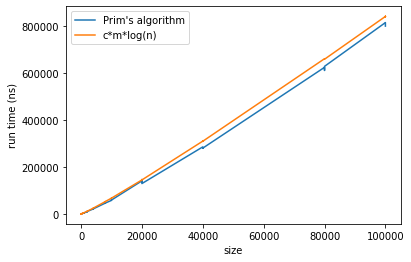

In [ ]:
reference = [c*m*math.log(n) for n,m in zip(sorted_sizes,num_edges)]
plt.plot(sorted_sizes, sorted_runtimes)
plt.plot(sorted_sizes, reference)
plt.legend(["Prim's algorithm", "c*m*log(n)"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.savefig('prim_plot.png', dpi=300)
plt.show()

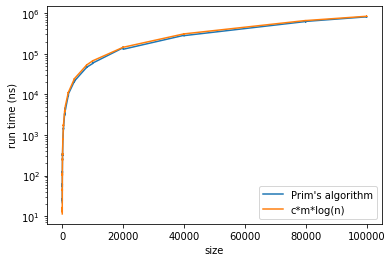

In [ ]:
plt.plot(sorted_sizes, sorted_runtimes)
plt.yscale("log")
plt.plot(sorted_sizes, reference)
plt.legend(["Prim's algorithm", "c*m*log(n)"])
plt.ylabel('run time (ns)')
plt.xlabel('size')
plt.savefig('prim_plot_logarithmic.png', dpi=300)
plt.show()